# Session 6 Stats Homework

## 0. Import the relevant modules

In [1]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Load the data

In [12]:
data = pd.read_csv("/Users/rcorps/Documents/IMPRSPython/session_6/lexdec_results.csv")

View the data

In [13]:
data

,Unnamed: 0,id,word,frequency,duration,reaction_time,response,subject,accuracy
0,0,102,labber,none,0.405079,0.740607,m,1,1
1,1,163,plond,none,0.567166,0.662209,m,1,1
2,2,175,nergen,none,0.544580,1.063122,m,1,1
3,3,99,bij,HF,0.332517,0.751887,z,1,1
4,4,94,gedaan,HF,0.624558,0.748802,z,1,1
...,...,...,...,...,...,...,...,...,...
795,195,50,gisten,LF,0.546621,0.785617,z,4,1
796,196,195,pirrel,none,0.361179,0.733906,m,4,1
797,197,24,wrongel,LF,0.538685,0.802661,m,4,0
798,198,128,kandola,none,0.500204,0.880469,m,4,1


## 2. Table summarizing the data

In [16]:
summary = data.groupby(by="frequency").aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std), 
    mean_acc=pd.NamedAgg('accuracy', np.mean), 
    std_acc=pd.NamedAgg('accuracy', np.std), 
)


# reset the index (we've seen this last week)
summary.reset_index(inplace=True)
print(summary)

  frequency   mean_RT    std_RT  mean_acc   std_acc
0        HF  0.793150  0.161619    0.8850  0.319823
1        LF  0.863831  0.188257    0.6800  0.467647
2      none  0.842566  0.169741    0.9375  0.242365


## 3. Plot of reaction time

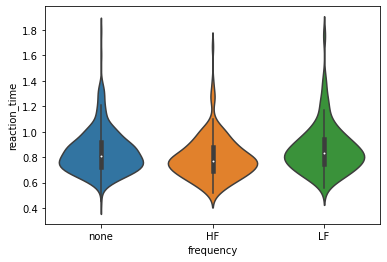

In [17]:
ax = sns.violinplot(x="frequency", y="reaction_time", data=participants)

## 4. Plot of accuracy

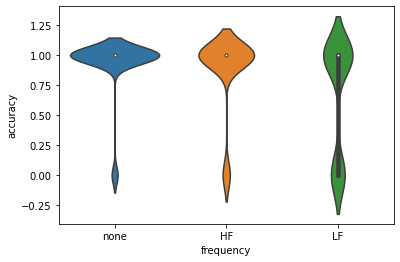

In [18]:
ax = sns.violinplot(x="frequency", y="accuracy", data=participants)

## 5. Analyse reaction times with LMM 

In [20]:
import statsmodels.formula.api as smf

lmm0 = smf.mixedlm("reaction_time ~ frequency", participants, groups = 'id', re_formula='1')
lmm0f = lmm0.fit()
print(lmm0f.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: reaction_time
No. Observations: 800     Method:             REML         
No. Groups:       200     Scale:              0.0298       
Min. group size:  4       Log-Likelihood:     260.9062     
Max. group size:  4       Converged:          Yes          
Mean group size:  4.0                                      
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.793    0.012 64.983 0.000  0.769  0.817
frequency[T.LF]   0.071    0.017  4.095 0.000  0.037  0.105
frequency[T.none] 0.049    0.015  3.306 0.001  0.020  0.079
id Var            0.000    0.005                           



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
